In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import scipy.stats as ss
from scipy.interpolate import interp1d
from scipy.special import expit
from fractions import Fraction
from empiricaldist import Pmf, Cdf
import matplotlib.pyplot as plt
from collections import Counter
import statsmodels.formula.api as smfa

In [2]:
from data.utils import make_binomial, update_euro, update_binomial

In [3]:
n = 250
p = 0.5
k = 110
ss.binom(n, p).cdf(k)

0.033210575620021665

<AxesSubplot:>

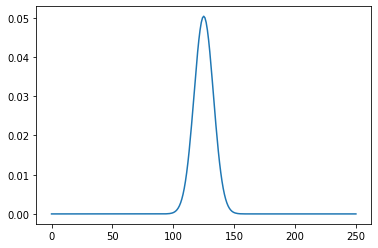

In [6]:
ks = np.arange(n + 1)
ps = ss.binom(n, p).pmf(ks)
pd.Series(ps, index=ks).plot()

<AxesSubplot:>

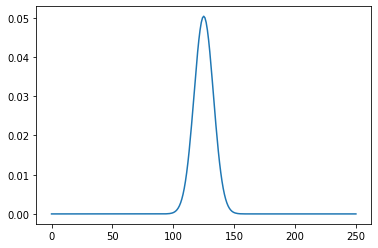

In [7]:
pmf_k = Pmf(ps, ks)
pmf_k.plot()

In [8]:
pmf_k = make_binomial(250, 0.5)
pmf_k.max_prob(), pmf_k.mean()

(125, 125.00000000000003)

In [10]:
# CDF를 구할 수 있는 메서드 : ex) pmf_obj.prob_le(x) → P(X <= x)
pmf_k.prob_ge(140), pmf_k.prob_le(110)

(0.03321057562002164, 0.03321057562002164)

In [11]:
hypos = np.linspace(0, 1, 101)
prior = Pmf(1, hypos)
prior.normalize()

101

In [12]:
likelihood_heads = hypos
likelihood_tails = 1 - hypos
likelihood = {'H':likelihood_heads, 'T':likelihood_tails}
likelihood

{'H': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
        0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
        0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
        0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
        0.99, 1.  ]),
 'T': array([1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9 ,
        0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79,
        0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68,
        0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57,
      

In [13]:
dataset = 'H' * 140 + 'T' * 110

In [16]:
posterior = update_euro(prior.copy(), likelihood, dataset)
posterior.head(10)

,probs
0.00,0.000000e+00
0.01,1.256330e-207
0.02,5.731921e-166
0.03,8.338711e-142
0.04,8.269265e-125
0.05,9.652275e-112
0.06,3.668356e-101
0.07,2.667365e-92
0.08,1.067804e-84
0.09,4.653042e-78


(0.56, <AxesSubplot:>)

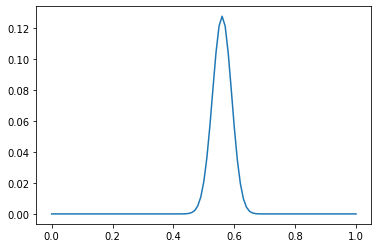

In [20]:
posterior.max_prob(), posterior.plot()

In [21]:
ramp_up = np.arange(50)
ramp_down = np.arange(50, -1, -1)
ramp = np.append(ramp_up, ramp_down)
ramp

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33,
       32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16,
       15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0])

<AxesSubplot:>

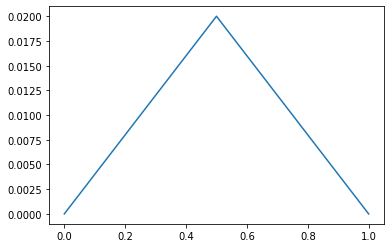

In [22]:
triangle = Pmf(ramp, hypos)
triangle.normalize()
triangle.plot()

In [23]:
posterior_tri = update_euro(triangle.copy(), likelihood, dataset)
posterior_tri.head(10)

,probs
0.00,0.000000e+00
0.01,2.856563e-209
0.02,2.606575e-167
0.03,5.688007e-143
0.04,7.520849e-126
0.05,1.097336e-112
0.06,5.004523e-102
0.07,4.245418e-93
0.08,1.942324e-85
0.09,9.521808e-79


(0.56, <AxesSubplot:>)

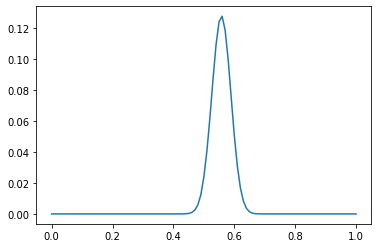

In [24]:
posterior_tri.max_prob(), posterior_tri.plot()

In [28]:
uniform2 = Pmf(ramp, hypos)
data = 140, 250
posterior_binomial = update_binomial(uniform2, data)
posterior_binomial

,probs
0.00,0.000000e+00
0.01,2.856563e-209
0.02,2.606575e-167
0.03,5.688007e-143
0.04,7.520849e-126
...,...
0.96,1.916921e-84
0.97,1.107834e-97
0.98,1.324197e-116
0.99,2.113001e-149


In [29]:
np.allclose(posterior_tri, posterior_binomial)

True

<AxesSubplot:>

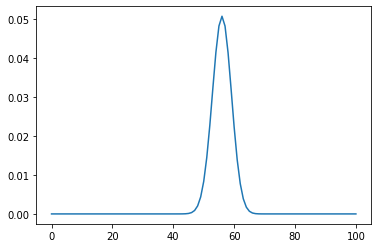

In [35]:
# likelihood 확률분포의 확인
Pmf(ss.binom(n, prior.qs).pmf(140), np.arange(101)).plot()